##### Disclaimers 
This material is derived from **[scikit-learn-mooc](https://github.com/INRIA/scikit-learn-mooc)** under the fair-usage clause of `Creative Commons`.

*References to all the sources apart from the scikit-learn-mooc are linked*

### FIFTH SESSION

We will introduce how to build ensembles of tree-based models. Tree-based models are powerful predictors but individually they are kind of limited. 

In particular, when the trees are deep, they tend to overfit and underfit if they are too shallow. We will see how to fight against those weaknesses by building ensembles to get more powerful models that generalize better. 

<br>

There are many strategies to build decision trees. 

*The first strategy is called Bagging, or bootstrap aggregating, and can be further refined into what we call a random forest.* 

*The second family of ensembles for decision trees is called boosting and can be further refined into gradient boosted decision trees.* 

We can use both of these strategies for classification and regression problems. 

<br>

#### Intuitions on ensemble models : Bagging

In this section we learn about **Bagging**.

We will use a toy classification problem where we have just two input features represented by the two axes of this diagram, and the goal is to predict the color and the shape of the data points. 

So, there are two possible groups, either the blue circles or the orange squares. So, based on the input feature, we want to predict whether it should be classified as blue or orange based on the position of the given new data point. 

![classification data](../figures/bagging/BAG_C_0.png)

<br>

**Bagging** stands for bootstrap aggregation or bootstrap aggregating

So the first step in Bagging is Booting. And the second step is aggregation.

Here in our toy example, in the first step, i.e., bootstrapping, we will generate the three variations of the original training set by randomly taking a subset of the data points. 

![bootstrap data](../figures/bagging/BAG_C_1.png)

Here we use three bootstrap samples, but we would use hundreds of them in practice. And on average, you see that each data point of the original training set will appear many times in independent bootstrap samples. 

<br>

So when we do bagging, the first stage is to fit an individual independent model on each bootstrap sample. 

If we consider decision trees as the basic model, we will get three different decision trees for the three different bootstrap samples. For simplicity, we use single-depth decision trees, but we tend to use deep trees in practice, and we would not limit the depth.

![model fitting on bootstrap data](../figures/bagging/BAG_C_2.png)

So this is the first part, which is called bootstrapping. 

<br>

And in the second part, i.e., aggregation, we will consider the aggregated predictions of the three models from the bootstrapping step. 

So let's consider a test data point, denoted by the grey cross. The first decision tree will predict it on the right side of the decision split and will vote for orange. The second decision tree will vote for blue because it's on the upper side of its decision function. And the third decision tree will vote for blue again because it's on the left side of its decision function. 

![aggregate the votes](../figures/bagging/BAG_C_3.png)

So we have a majority of two blue votes, so the vote of the ensemble will be blue. We aggregated the votes from each booting model. 

<br>

In scikit-learn, we can import BaggingClassifier from the ensemble submodule. Alternatively, if you want to be sure to use decision trees in your bagging ensemble, you can directly use a random forest classifier.

![sklearn and bagging](../figures/bagging/BAG_C_4.png)


The typical prediction that the ensemble makes is higher quality than the prediction, the average quality of the individual trees. And the main reason is that even if the individual decision trees overfit individually by memorizing some noise of the individual training sets here, the average will overfit less, which becomes more visually evident in a regression problem. 


For regression demonstration, we consider a minimal training set with a single input feature, a continuous input feature called X, and the target variable, which is also continuous, called Y. 

![Regression data](../figures/bagging/BAG_R_1.png)

We can see that the optimal relationship between X and Y is a nonlinear prediction function. We can also see that for a given position of X, there are several valid values for Y in the training set, which means that there is some noise, at least that it's not possible to make a perfect prediction for Y given X because possibly we lack additional features that would make it possible to make better predictions and get no noise in the prediction function. 

<br>


To do Bagging on the given regression problem, we will sub-sample by bootstrapping various variations of the original training set. Each variation is represented with black data points. The selected black data points will not be the same for each variation. Still, if we consider many such variations, i.e., many such bootstraps, there will be a subset of variations that together represent all the original data points.

![bootstrap data](../figures/bagging/BAG_R_2.png)

<br>

Now on each subset, we will fit one decision tree, this time for regression. And here, we do not limit the depth of the decision trees, which means that the regression decision trees will perfectly fit all the black data points of each subset. And you see that because they are not limited, they can overfit they memorize training data noise that is not likely to generalize well to unseen test data points. 

![model fitting on bootstrap data](../figures/bagging/BAG_R_3.png)

But what is important is that the way they overfit the individual decision trees is different. And so the prediction errors are not necessarily well correlated, which is very powerful because then when we take the average, the average prediction does not overfit anymore. 

<br>

And if we take the average prediction over hundreds of such sub-samples, the prediction function would be very smooth. It will not overfit anymore. And so, this is the central intuition of Bagging. 

![model fitting on bootstrap data](../figures/bagging/BAG_R_4.png)

The power of Bagging is basically to cancel the overfitting of individual decision trees.


<br>


We will look at the subtle yet critical difference between random forests and bagging for decision trees. 

**Bagging is a general strategy that can work for any base model - for linear models, decision trees, support vector machines, and neural networks. You could do it for any machine learning algorithm.** 

However, we can refine it in the case of decision trees by doing what we call *Bagging of randomized decision trees*. So **random forest is a way to apply Bagging on randomized decision trees**. And here, randomized is the crucial word. 

We want to de-correlate the prediction errors of the individual decision trees, and thus we inject an additional randomization step in the learning algorithm of each decision tree. 

![random forests](../figures/bagging/BAG_RF.png)

So when we consider a split, *instead of considering all the possible features to select the best features to split on, we randomly subsample the features for the split*, and we will compute the best split for this restricted sub-sample of all the possible features. 

And then, when we will try to find the best subsequent split, we will randomly subsample another subset of the features. So when we train decision trees this way, we inject some noisy constraints into the tree learning procedure. 

![random vs decision](../figures/bagging/BAG_SUM_2.png)

And the goal of this is to inject extra randomization that will de-correlate the prediction error and make the averaging step of the bagging algorithm work better. And make a more robust prediction model by un-correlating the errors. 


<br>

![summary](../figures/bagging/BAG_SUM_1.png)

<br>

[source](https://towardsdatascience.com/seeing-the-forest-for-the-trees-an-introduction-to-random-forest-41a24fc842ac)



##### Benefit of ensemble models over simple models

Below, we will see the benefits of ensemble methods over simple models (e.g., decision tree, linear model, etc.). 

Combining simple models results in more powerful and robust models with less hassle.

We will start by loading the California housing dataset. We recall that the goal of this dataset is to predict the median house value in some districts in California based on demographic and geographic data.

First, we will check the generalization performance of the decision tree regressor with default parameters.

We will obtain fair results with the decision tree regressor with default parameters. However, as discussed previously, `DecisionTreeRegressor` needs to be tuned to overcome overfitting or underfitting. 

Indeed, the default parameters will not necessarily lead to an optimal decision tree. Instead of using the default value, we will search via cross-validation for the optimal value of the important parameters such as `max_depth`, `min_samples_split`, or `min_samples_leaf`.

As discussed earlier, we need to tune these parameters, as decision trees tend to overfit the training data if we grow deep trees, but there are no rules for each parameter. Thus, not searching could lead to an under-fitted or over-fitted model.


We will see that optimizing the hyperparameters will positively affect the generalization performance. However, it comes with a higher computational cost.


Finally, we will use an ensemble method called bagging. We will learn more about this method later. In short, this method will use a base regressor (i.e., decision tree regressors) and will train several of them on a slightly modified version of the training set. Then, the predictions of all these base regressors will be combined by averaging.

We will use 20 decision trees and check the fitting time and the generalization performance on the left-out testing data. 

*It is important to note that we are not going to tune any parameter of the decision tree.*

We notice that without searching for optimal hyperparameters, the overall generalization performance of the bagging regressor is better than a single decision tree. 

In addition, the computational cost is reduced compared to seeking optimal hyperparameters.

**This shows the motivation behind using an ensemble learner: it gives a relatively good baseline with decent generalization performance without any parameter tuning.**

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn import set_config

set_config(display="diagram")

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    random_state=42
)

tree

DecisionTreeRegressor(random_state=42)

In [3]:
cv_results = cross_validate(
    tree,
    data,
    target,
    n_jobs=2
)
scores = cv_results["test_score"]

print(
    f"R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.355 +/- 0.081


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Now, we make a grid-search to tune the hyperparameters that we mentioned earlier.
param_grid = {
    "max_depth": [5, 8, None],
    "min_samples_split": [2, 10, 30, 50],
    "min_samples_leaf": [0.01, 0.05, 0.1, 1]
}

cv = 3

tree = GridSearchCV(
    DecisionTreeRegressor(
        random_state=42
    ),
    param_grid=param_grid,
    cv=cv,
    n_jobs=2
)

tree

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [5, 8, None],
                         'min_samples_leaf': [0.01, 0.05, 0.1, 1],
                         'min_samples_split': [2, 10, 30, 50]})

In [5]:
%%time
cv_results = cross_validate(
    tree,
    data,
    target,
    n_jobs=2,
    return_estimator=True
)

scores = cv_results["test_score"]

print(
    f"R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.523 +/- 0.107
CPU times: user 7.54 ms, sys: 4.25 ms, total: 11.8 ms
Wall time: 7.78 s


In [6]:
from sklearn.ensemble import BaggingRegressor

base_estimator = DecisionTreeRegressor(
    random_state=42
)

bagging_regressor = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=20,
    random_state=42
)

bagging_regressor

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=20, random_state=42)

In [7]:
%%time
cv_results = cross_validate(
    bagging_regressor,
    data,
    target,
    n_jobs=2
)

scores = cv_results["test_score"]

print(
    f"R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.647 +/- 0.075
CPU times: user 6.27 ms, sys: 3.6 ms, total: 9.86 ms
Wall time: 4.36 s


##### The Idea of Bagging 

We will introduce a natural strategy to build ensembles of machine learning models named "bagging".

**"Bagging" stands for Bootstrap AGGregatING.** 

It uses bootstrap resampling (random sampling with replacement) to learn several models on random variations of the training set. 

At predict time, the predictions of each learner are aggregated to give the final predictions.

To start, we will generate a simple synthetic dataset to get insights regarding bootstrapping. In this dataset, the relationship between the feature and the target to predict will be non-linear. However, we know that a decision tree can approximate such a non-linear dependency. 

Then we will introduce the idea of **bootstrap resampling** 

**Bootstrap resampling**

A bootstrap sample corresponds to a resampling with replacement of the original dataset, a sample that is the same size as the original dataset. 
*Thus, the bootstrap sample will contain some data points several times, while some of the original data points will not be present.*

We will create a function that, given data and target, will return a resampled variation `data_bootstrap` and `target_bootstrap`. Then we will generate three bootstrap samples and qualitatively check the difference with the original dataset.

We will observe that the three variations share common points with the original dataset. Still, some points are randomly resampled several times and appear as darker blue circles.

The three generated bootstrap samples will be different from the original dataset and each other. We will check the number of unique samples in the bootstrap samples to confirm this intuition.

 On average, ~63.2% of the original data points of the original dataset will be present in a given bootstrap sample. The other ~36.8% are repeated samples. This can be proven mathematically, but it is beyond the scope.

So by using this idea of resampling, we can generate many datasets, all slightly different, and we can fit a decision tree for each of these datasets, and they all shall be slightly different. And when we use each of the trees to predict the samples within the range of data. They shall give slightly different predictions.

**Aggregating**

Once our trees are fitted, we will be able to get predictions for each of them. In regression, the most straightforward way to combine those predictions is to average them. For a given test data point, we feed the input feature values to each of the n trained models in the ensemble and, as a result, compute n predicted values for the target variable. The final prediction of the ensemble for the test data point is the average of those n values.

Note that the ensemble predictions are more stable because of the averaging operation. As a result, the bag of trees is less likely to overfit than the individual trees.



In [8]:
import pandas as pd
import numpy as np

# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(42)


def generate_data(n_samples=30):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_min, x_max = -3, 3

    x = rng.uniform(
        x_min,
        x_max,
        size=n_samples
    )

    noise = 4.0 * rng.randn(n_samples)
    
    y = x ** 3 - 0.5 * (x + 1) ** 2 + noise

    y /= y.std()

    data_train = pd.DataFrame(
        x,
        columns=["Feature"]
    )

    data_test = pd.DataFrame(
        np.linspace(x_max, x_min, num=300),
        columns=["Feature"]
    )

    target_train = pd.Series(
        y,
        name="Target"
    )

    return data_train, data_test, target_train

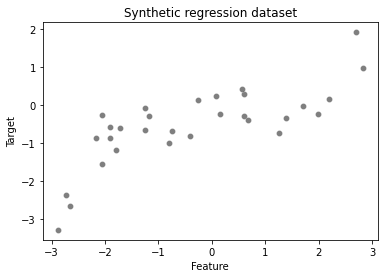

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

data_train, data_test, target_train = generate_data(
    n_samples=30
)

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

_ = plt.title("Synthetic regression dataset")

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

tree

DecisionTreeRegressor(max_depth=3, random_state=42)

In [11]:
tree.fit(
    data_train,
    target_train
)

y_pred = tree.predict(data_test)

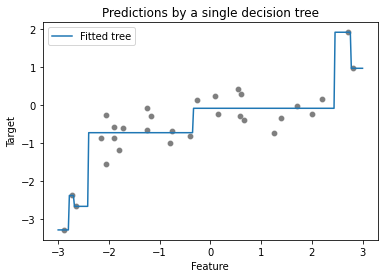

In [12]:
sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test["Feature"],
    y_pred,
    label="Fitted tree"
)

plt.legend()

_ = plt.title("Predictions by a single decision tree")

In [13]:
def bootstrap_sample(data, target):
    # Indices corresponding to a sampling with replacement of the same sample
    # size than the original data
    bootstrap_indices = rng.choice(
        np.arange(target.shape[0]),
        size=target.shape[0],
        replace=True,
    )
    # In pandas, we need to use `.iloc` to extract rows using an integer
    # position index:
    data_bootstrap = data.iloc[bootstrap_indices]
    target_bootstrap = target.iloc[bootstrap_indices]
    return data_bootstrap, target_bootstrap

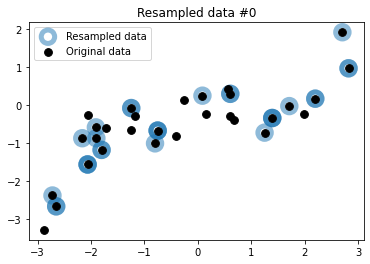

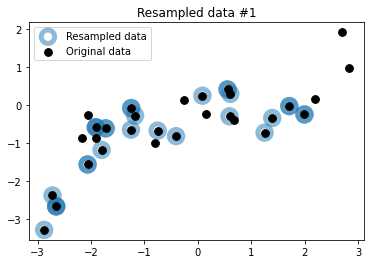

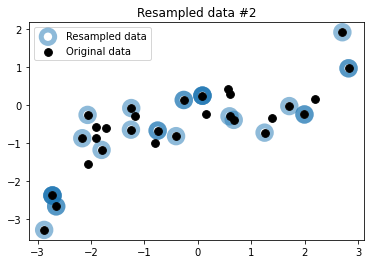

In [14]:
n_bootstraps = 3

for bootstrap_idx in range(n_bootstraps):
    # draw a bootstrap from the original data
    data_bootstrap, target_bootstrap = bootstrap_sample(
        data_train,
        target_train,
    )

    plt.figure()
    plt.scatter(
        data_bootstrap["Feature"],
        target_bootstrap,
        color="tab:blue",
        facecolors="none",
        alpha=0.5,
        label="Resampled data",
        s=180,
        linewidth=5
    )

    plt.scatter(
        data_train["Feature"],
        target_train,
        color="black",
        s=60,
        alpha=1,
        label="Original data"
    )
    
    plt.title(f"Resampled data #{bootstrap_idx}")
    plt.legend()

In [15]:
data_train_huge, data_test_huge, target_train_huge = generate_data(
    n_samples=100_000
)

data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample(
    data_train_huge,
    target_train_huge
)

ratio_unique_sample = (
    np.unique(data_bootstrap_sample).size / data_bootstrap_sample.size
)

print(
    f"Percentage of samples present in the original dataset: "
    f"{ratio_unique_sample * 100:.1f}%"
)

Percentage of samples present in the original dataset: 63.3%


In [16]:
# list to store the trees
bag_of_trees = []
for bootstrap_idx in range(n_bootstraps):

    tree = DecisionTreeRegressor(
        max_depth=3,
        random_state=42
    )

    data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample(
        data_train,
        target_train
    )

    tree.fit(
        data_bootstrap_sample,
        target_bootstrap_sample
    )
    
    bag_of_trees.append(tree)

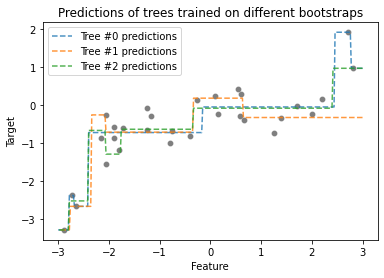

In [17]:
sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

for tree_idx, tree in enumerate(bag_of_trees):
    
    tree_predictions = tree.predict(data_test)

    plt.plot(
        data_test["Feature"],
        tree_predictions,
        linestyle="--",
        alpha=0.8,
        label=f"Tree #{tree_idx} predictions"
    )

plt.legend()

_ = plt.title("Predictions of trees trained on different bootstraps")

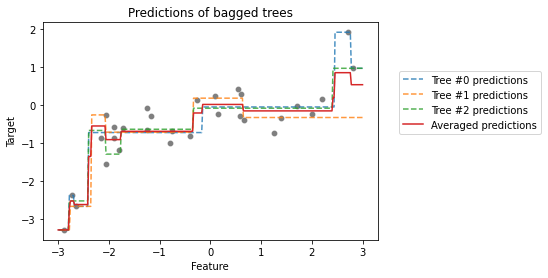

In [18]:
sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

bag_predictions = []

for tree_idx, tree in enumerate(bag_of_trees):

    tree_predictions = tree.predict(data_test)

    plt.plot(
        data_test["Feature"],
        tree_predictions,
        linestyle="--",
        alpha=0.8,
        label=f"Tree #{tree_idx} predictions"
    )

    bag_predictions.append(tree_predictions)

bag_predictions = np.mean(
    bag_predictions,
    axis=0
)

plt.plot(
    data_test["Feature"],
    bag_predictions,
    label="Averaged predictions",
    linestyle="-"
)

plt.legend(
    bbox_to_anchor=(1.05, 0.8),
    loc="upper left"
)

"""
The unbroken red line shows the averaged predictions, 
which would be the final predictions given by our 'bag' of decision tree regressors. 
"""

_ = plt.title("Predictions of bagged trees")

##### Bagging in scikit-learn

Scikit-learn implements the bagging procedure as a **"meta-estimator"**, that is, *an estimator that wraps another estimator*

It takes a base model cloned several times and trained independently on each bootstrap sample.

We will look at a code snippet that shows how to build a bagging ensemble of decision trees. 

We will set `n_estimators=100` instead of 3 like in the manual implementation above to get a more substantial smoothing effect.

And because we use 100 trees in the ensemble, the average prediction will be slightly smoother but very similar to the previous average where we worked on three bootstrap samples.

Also, note that it is possible to access the internal models of the ensemble stored as a Python list in the `bagged_trees.estimators_` attribute after fitting.


In [19]:
from sklearn.ensemble import BaggingRegressor

bagged_trees = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(
        max_depth=3
    ),
    n_estimators=100,
)
bagged_trees

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=100)

CPU times: user 154 ms, sys: 25 ms, total: 179 ms
Wall time: 77.4 ms


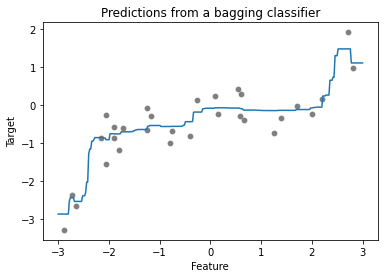

In [20]:
%%time
_ = bagged_trees.fit(
    data_train,
    target_train
)

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

bagged_trees_predictions = bagged_trees.predict(
    data_test
)

plt.plot(
    data_test["Feature"],
    bagged_trees_predictions
)

_ = plt.title("Predictions from a bagging classifier")

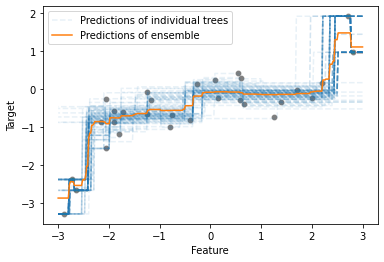

In [21]:
for tree_idx, tree in enumerate(bagged_trees.estimators_):
    # one label for all individual trees
    label = "Predictions of individual trees" if tree_idx == 0 else None
    # we convert `data_test` into a NumPy array to avoid a warning raised in scikit-learn
    tree_predictions = tree.predict(
        data_test.to_numpy()
    )
    
    plt.plot(
        data_test["Feature"],
        tree_predictions,
        linestyle="--",
        alpha=0.1,
        color="tab:blue",
        label=label
    )

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

bagged_trees_predictions = bagged_trees.predict(
    data_test
)

plt.plot(
    data_test["Feature"],
    bagged_trees_predictions,
    color="tab:orange",
    label="Predictions of ensemble"
)

_ = plt.legend()

##### Bagging complex pipelines

While we used a decision tree as a base model, nothing prevents us from using any other model type.

As we know that the original data-generating function is a noisy polynomial transformation of the input variable, we will try to fit a bagged polynomial regression pipeline on this dataset:


We create a pipeline that first scales the data to the 0-1 range with `MinMaxScaler`.
Then it extracts degree-4 polynomial features. 

The resulting features will all stay in the 0-1 range by construction: if `x` lies in the `0-1` range, then `x ** n` also lies in the `0-1` range for any value of `n`.

Then the pipeline feeds the resulting non-linear features to a regularized linear regression model for the final prediction of the target variable.

We will intentionally use a small value for the regularization parameter `alpha` as we expect the bagging ensemble to work well with slightly overfit base models.

The ensemble itself is built by passing the resulting pipeline as the `base_estimator` parameter of the `BaggingRegressor` class:

The predictions of this bagged polynomial regression model look qualitatively better than the bagged trees, which is somewhat expected since the base model reflects our knowledge of the true data generating process.

Again the different shades induced by the overlapping blue lines let us appreciate the uncertainty in the prediction of the bagged ensemble.

Please note that the bootstrapping procedure is a generic tool of statistics and is not limited to building an ensemble of machine learning models. The interested reader can learn more on the [Wikipedia](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)).

In [22]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


polynomial_regressor = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=4),
    Ridge(alpha=1e-10),
)

bagging = BaggingRegressor(
    base_estimator=polynomial_regressor,
    n_estimators=100,
    random_state=42,
)
bagging


BaggingRegressor(base_estimator=Pipeline(steps=[('minmaxscaler',
                                                 MinMaxScaler()),
                                                ('polynomialfeatures',
                                                 PolynomialFeatures(degree=4)),
                                                ('ridge', Ridge(alpha=1e-10))]),
                 n_estimators=100, random_state=42)

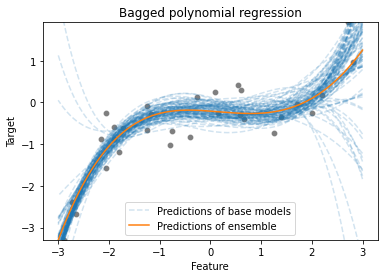

In [23]:
_ = bagging.fit(data_train, target_train)

for i, regressor in enumerate(bagging.estimators_):
    # we convert `data_test` into a NumPy array to avoid a warning raised in scikit-learn
    regressor_predictions = regressor.predict(data_test.to_numpy())
    base_model_line = plt.plot(
        data_test["Feature"],
        regressor_predictions,
        linestyle="--",
        alpha=0.2,
        label="Predictions of base models" if i == 0 else None,
        color="tab:blue"
    )

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

bagging_predictions = bagging.predict(data_test)

plt.plot(
    data_test["Feature"],
    bagging_predictions,
    color="tab:orange",
    label="Predictions of ensemble"
)

plt.ylim(
    target_train.min(),
    target_train.max()
)

plt.legend()

_ = plt.title("Bagged polynomial regression")

##### Hyperparameter tuning in Bagging

Now we quicly investigate if we can tune the hyperparameters of a bagging regressor and evaluate the gain obtained.

We will load the California housing dataset and split it into a training and a testing set.

First we create BaggingRegressor and provide a DecisionTreeRegressor to its parameter base_estimator, then train the regressor and evaluate its generalization performance on the testing set using the mean absolute error.

After that we create a RandomizedSearchCV instance using the previous model and tune the important parameters of the bagging regressor. 

We will try to find the best parameters and check if we are able to find a set of parameters that improve the default regressor while still using the mean absolute error as a metric.

We will see that the predictor provided by the bagging regressor does not need much hyperparameter tuning compared to a single decision tree.

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42,
    test_size=0.5
)

tree = DecisionTreeRegressor()
bagging = BaggingRegressor(
    base_estimator=tree,
    n_jobs=2
)

bagging

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_jobs=2)

In [25]:
bagging.fit(
    data_train,
    target_train
)

target_predicted = bagging.predict(
    data_test
)

print(
    f"Basic mean absolute error of the bagging regressor:\n"
    f"{mean_absolute_error(target_test, target_predicted):.2f} k$"
)

Basic mean absolute error of the bagging regressor:
36.74 k$


In [26]:
for param in bagging.get_params().keys():
    print(param)

base_estimator__ccp_alpha
base_estimator__criterion
base_estimator__max_depth
base_estimator__max_features
base_estimator__max_leaf_nodes
base_estimator__min_impurity_decrease
base_estimator__min_samples_leaf
base_estimator__min_samples_split
base_estimator__min_weight_fraction_leaf
base_estimator__random_state
base_estimator__splitter
base_estimator
bootstrap
bootstrap_features
max_features
max_samples
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


In [27]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

param_grid = {
    "n_estimators": randint(10, 30),
    "max_samples": [0.5, 0.8, 1.0],
    "max_features": [0.5, 0.8, 1.0],
    "base_estimator__max_depth": randint(3, 10),
}

search = RandomizedSearchCV(
    bagging,
    param_grid,
    n_iter=20,
    scoring="neg_mean_absolute_error"
)

search

RandomizedSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                              n_jobs=2),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1691dc580>,
                                        'max_features': [0.5, 0.8, 1.0],
                                        'max_samples': [0.5, 0.8, 1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x169238490>},
                   scoring='neg_mean_absolute_error')

In [28]:
_ = search.fit(
    data_train,
    target_train
)


columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_samples,param_max_features,param_base_estimator__max_depth,mean_test_error,std_test_error
14,16,0.8,0.8,9,39.647159,0.549056
5,20,1.0,1.0,9,39.708262,1.059094
0,16,0.5,1.0,9,40.101117,0.923414
1,25,1.0,0.8,8,40.322893,0.672914
11,16,1.0,1.0,8,41.534237,0.809877
7,24,0.5,0.5,9,45.538905,0.861899
17,27,0.8,0.8,6,45.810962,0.607135
3,25,0.5,0.8,6,45.917176,0.822151
13,18,0.8,1.0,6,46.029181,0.604264
16,22,1.0,0.5,7,46.063568,0.844253


In [29]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.apply(
        {
            "param_n_estimators": lambda x : x,
            "param_max_samples": lambda x : x,
            "param_max_features": lambda x : x,
            "param_base_estimator__max_depth": lambda x: x,
            "mean_test_error": lambda x: x,
        }
    ),
    color="mean_test_error",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [30]:
target_predicted = search.predict(data_test)
print(
    f"Mean absolute error after tuning of the bagging regressor:\n"
    f"{mean_absolute_error(target_test, target_predicted):.2f} k$"
)

Mean absolute error after tuning of the bagging regressor:
40.11 k$


##### Random forests

We will present the random forest models and show the differences with the bagging ensembles.

Random forests are a popular model in machine learning. They are a modification of the bagging algorithm. 

**In bagging, any classifier or regressor can be used. The base classifier or regressor in random forests is always a decision tree.**

<br>

*Random forests have another particularity: when training a tree, the search for the best split is done only on a subset of the original features taken randomly. The random subsets are different for each split node.*

The goal is to inject additional randomization into the learning procedure to decorrelate the prediction errors of the individual trees.

Therefore, random forests are using **randomization on both axes of the data matrix**:

- by **bootstrapping samples** for **each tree** in the forest;
- randomly selecting a **subset of features** at **each node** of the tree.

<br>

**Quick look at random forest**

We will illustrate the usage of a random forest classifier on the adult census dataset.


The adult census contains some categorical data. We encode the categorical features using an `OrdinalEncoder` since tree-based models can work very efficiently with such a naive representation of categorical variables.

Since there are rare categories in this dataset, we need to specifically encode unknown categories at prediction time to be able to use cross-validation. Otherwise, some rare categories could only be present on the validation side of the cross-validation split, and the `OrdinalEncoder` would raise an error when calling its `transform` method with the data points
of the validation set.


We will first use a simple example of training a single decision tree classifier and checking its generalization performance via cross-validation.


Similar to what was done in the previous section, we construct a `BaggingClassifier` with a decision tree classifier as a base model. In addition, we need to specify how many models we want to combine. 

Note that ... 

1. We also need to preprocess the data and thus use a scikit-learn pipeline.

2. The generalization performance of the bagged trees is already much better than the performance of a single tree.

<br>

Finally we will use a random forest. We do not need to specify any `base_estimator` because the estimator is forced to be a decision tree. Thus, we specify the desired number of trees in the forest.


In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")
target_name = "class"
data = adult_census.drop(
    columns=[target_name, "education-num"]
)

target = adult_census[target_name]

print(f"number of features in X data are {len(data.columns)}")

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

preprocessor = make_column_transformer(
    (
        categorical_encoder,
        make_column_selector(dtype_include=object)
    ),

    remainder="passthrough"
)

tree = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(
        random_state=42
    )
)

tree

number of features in X data are 12


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169504eb0>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [32]:
scores_tree = cross_val_score(
    tree,
    data,
    target
)

print(
    f"Decision tree classifier: "
    f"{scores_tree.mean():.3f} +/- {scores_tree.std():.3f}"
)

Decision tree classifier: 0.819 +/- 0.004


In [33]:
from sklearn.ensemble import BaggingClassifier

bagged_trees = make_pipeline(
    preprocessor,
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(
            random_state=42
        ),
        n_estimators=50,
        n_jobs=2,
        random_state=42,
    )
)

bagged_trees

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169504eb0>)])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                   n_estimators=50, n_jobs=2,
                                   random_state=42))])

In [34]:
scores_bagged_trees = cross_val_score(
    bagged_trees,
    data,
    target
)

print(
    f"Bagged decision tree classifier: "
    f"{scores_bagged_trees.mean():.3f} +/- {scores_bagged_trees.std():.3f}"
)

Bagged decision tree classifier: 0.846 +/- 0.006


In [35]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_estimators=50,
        n_jobs=2,
        random_state=42
    )
)
random_forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169504eb0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50, n_jobs=2,
                                        random_state=42))])

In [36]:
scores_random_forest = cross_val_score(
    random_forest,
    data,
    target
)
"""
It seems that the random forest is performing slightly better than the bagged trees, 
possibly due to the randomized selection of the features, 
which decorrelates the prediction errors of individual trees and, 
consequently, makes the averaging step more efficient at reducing overfitting.
"""
print(
    f"Random forest classifier: "
    f"{scores_random_forest.mean():.3f} +/- "
    f"{scores_random_forest.std():.3f}"
)

Random forest classifier: 0.850 +/- 0.003


*Exploring attributes of scikit-learn's random forest.*


We will use the penguin's regression dataset.

We will create a random forest containing three trees. 

Then we create a new dataset containing the penguins with a flipper length between 170 mm and 230 mm. 

We will train the forest and check the generalization performance on the testing set in terms of mean absolute error. 

After that, we plot the training data using a scatter plot and plot the decision of each tree by predicting on the newly created dataset and finally plot the decision of the random forest using this newly created dataset.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"

data, target = penguins[[feature_name]], penguins[target_name]

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)

forest = RandomForestRegressor(
    n_estimators=3
)

forest.fit(
    data_train,
    target_train
)

target_predicted = forest.predict(data_test)

print(
    f"Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} grams"
)


Mean absolute error: 310.793 grams


In [38]:
import numpy as np

data_range = pd.DataFrame(
    np.linspace(170, 235, num=300),
    columns=data.columns
)

tree_predictions = []

for tree in forest.estimators_:
    # we convert `data_range` into a NumPy array to avoid a warning raised in scikit-learn
    tree_predictions.append(tree.predict(data_range.to_numpy()))

forest_predictions = forest.predict(data_range)

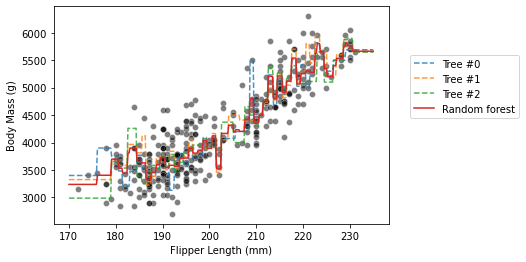

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

# plot tree predictions
for tree_idx, predictions in enumerate(tree_predictions):
    plt.plot(
        data_range[feature_name],
        predictions,
        label=f"Tree #{tree_idx}",
        linestyle="--",
        alpha=0.8
    )

plt.plot(
    data_range[feature_name],
    forest_predictions,
    label=f"Random forest"
)

_ = plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")

##### Notes on default hyperparameters

For random forests, it is possible to control the amount of randomness for each split by setting the value of `max_features` hyperparameter:

- `max_features=0.5` means that 50% of the features are considered at each split;
- `max_features=1.0` means that all features are considered at each split which effectively disables feature subsampling.

By default, `RandomForestRegressor` disables feature subsampling while `RandomForestClassifier` uses `max_features=np.sqrt(n_features)`. 
These default values reflect good practices given in the scientific literature.

However, `max_features` is one of the hyperparameters to consider when tuning a random forest:

- too much randomness in the trees can lead to under-fitted base models and can be detrimental for the ensemble as a whole,
- too few randomness in the trees leads to more correlation of the prediction errors and reduces the benefits of the averaging step in terms of overfitting control.

In scikit-learn, the bagging classes also expose a `max_features` parameter.
However, `BaggingClassifier` and `BaggingRegressor` are agnostic concerning their base model. Therefore, random feature subsampling can only happen once before fitting each base model instead of several times per base model, as is when adding splits to a given tree.

We summarize these details in the following table:


| Ensemble model class     | Base model class          | Default value for `max_features`   | Features subsampling strategy |
|--------------------------|---------------------------|------------------------------------|-------------------------------|
| `BaggingClassifier`      | User specified (flexible) | `n_features` (no&nbsp;subsampling) | Model level                   |
| `RandomForestClassifier` | `DecisionTreeClassifier`  | `sqrt(n_features)`                 | Tree node level               |
| `BaggingRegressor`       | User specified (flexible) | `n_features` (no&nbsp;subsampling) | Model level                   |
| `RandomForestRegressor`  | `DecisionTreeRegressor`   | `n_features` (no&nbsp;subsampling) | Tree node level               

##### QUIZ 1

**1. By default, a `BaggingClassifier` or `BaggingRegressor` draw:**

a) random samples with replacement over training points 

b) random samples with replacement over features 

c) random samples without replacement over training points 

d) random samples without replacement over features

<br>

**2. In a `BaggingClassifier` or `BaggingRegressor`, the parameter base_estimator can be:**

a) any predictor 

b) a linear model predictor

<br>

**3. In the context of a classification problem, what are the differences between a bagging classifier and a random forest classifier:**

a) in a random forest, the base model is always a decision tree 

b) in a random forest, the split threshold values are decided completely at random 

c) in a random forest, a random resampling is performed both over features as well as over samples

<br>

#### Intuitions on ensemble models : Boosting


We will present the second strategy to build an ensemble of tree-based models, namely **boosting** and **gradient boosting**. 

<br>

We will start with the classification problem with the same toy data used to introduce bagging. 
The location in this two-dimensional space are the input variables for the classification model, and the classification task is just a binary classification task of blue versus orange.

![classification data](../figures/boosting/BOOST_C_1.png)


<br>

When we train a boosting ensemble, we will consider the complete training set at once instead of randomly sampling the training set. We will fit a classification model using a shallow decision tree and intentionally underfit it. 

When we fit the first decision tree with a depth of one, it decides to split vertically. And it will make some prediction errors even on the training set because it's underfitting. 

![first fit](../figures/boosting/BOOST_C_2.png)

Before we train the following decision tree, we will reweight the initial training set to emphasize the three data points, causing prediction errors. 

Basically, we highlight the prediction errors of the first models by giving them a higher weight, and when we train the second model in the ensemble, it doesn't make a prediction error for these three data points anymore.
*The second model will try to correct the prediction error of the previous models.*

If we consider the ensemble of the first two prediction models, they misclassify the orange data point of the trending set as blue. 

So in the next round, we will put more weight on this prediction error such that when we train the next tree in the ensemble, it will focus more specifically on not making a prediction error on the highlighted orange point.

![second fit](../figures/boosting/BOOST_C_3.png)

<br>

So, the three prediction rules from three small decision trees are the elements of the boosting ensemble that we've trained iteratively, sequentially, one after the other, to predict the previous models' prediction errors better. 

![second fit](../figures/boosting/BOOST_C_4.png)

<br>


We will look at the regression problem and use the same toy data set used earlier for bagging. 
We have a y variable that is represented as the target variable here on this y-axis, and the input variable is the x-axis on this plot. 

![Regression data](../figures/bagging/BAG_R_1.png)


We train the regression decision tree on this toy dataset, which has many variations, and we constrain the decision tree to have a limited number of splits. Thus, we force this decision tree to make some prediction errors even on the training set - it is an underfitting regression model. 

![first fit](../figures/boosting/BOOST_R_0.png)

<br>

![first fit underfits highlighted](../figures/boosting/BOOST_R_1.png)

We see that this model underfits a lot in the red-circled region. 

So, again, we will train sequential models to predict better where the first model or the previous models made prediction errors, and to do so, we will use what we call reweighting again. 

<br>

In the new round of model-fitting, we will give more importance to the training samples far away from the prediction function of the previous model. So, you see that those far away samples would receive a lot of weight, and the samples that are close to the prediction function will receive very little weight.

![reweighted prediction errors](../figures/boosting/BOOST_R_2.png)


<br>

Now we fit this new reweighted training set in the second-stage model. So, this time it's represented with the orange prediction function, and you see that it's focusing its attention on the highly-weighted training points from the prediction errors of the first blue model. 

![second fit](../figures/boosting/BOOST_R_3.png)

After that, we will combine the predictions of the first model and the second model's predictions to get this new prediction function for the ensemble. 

![ensemble of two models](../figures/boosting/BOOST_R_4.png)

<br>

We use this new "ensemble" of the previous two models, and we will give weights to the prediction errors of this new ensemble. So we will put more weights on the red-circled data points. 

![ensemble's underfits highlighted](../figures/boosting/BOOST_R_4_1.png)


![ensemble's reweighted prediction errors](../figures/boosting/BOOST_R_5.png)

<br>

We will train a third-stage model that will focus primarily on not making prediction errors for the highly weighted prediction samples. Iteratively, we will progressively refine the ensemble's prediction to remove the prediction errors of the previous steps in the ensembles.

![third fit](../figures/boosting/BOOST_R_6.png)

<br>

Again, we rewrite, we fit a new training ensemble ..

![errors](../figures/boosting/BOOST_R_7.png)

and, progressively, you see that the ensemble predictions are better and better, and they underfit less and less. 

![reweight..](../figures/boosting/BOOST_R_8.png)

Though the individual model is underfitting a lot.  

![ensemble's reweighted prediction errors](../figures/boosting/BOOST_R_9.png)

This new ensemble, a slightly bigger ensemble, is underfitting a bit less, a bit less, and even less here in this case.

We continue until we decide that we have converged, for instance by not making too many prediction errors on the training set.

![ensemble's reweighted prediction errors](../figures/boosting/BOOST_R_10.png)


This strategy to do boosting using reweighting of the training set at each step is called AdaBoost.

We can use AdaBoost classifier or AdaBoost regressor using any base model that supports the `sample_weight` attribute like logistic regression or decision trees. But if we want to use decision trees, we can make something even more computationally efficient. 


<br>


One such efficient variation is **gradient boosting**, and another is called **histogram gradient boosting**, which is much faster and more powerful in practice. 

So although AdaBoost  is useful for introducing the concept of boosting because it doesn't require a lot of mathematics, but in practice, we will use gradient boosting, actually histogram gradient boosting. 

<br>


*Quick look at gradient boosting and histogram boosting*


The histogram gradient boosting classifier in scikit-learn is more computationally efficient. Still, we can use the gradient boosting classifier in scikit-learn, which implements the traditional gradient boosting algorithm and works fine for small datasets - below 10,000 data points as a rule of thumb. 

The histogram gradient boosting classifier is much faster because it preprocesses the numerical features to work in a coarse approximation of 256 levels by default. And once it has discretized or binned the input features, it can work much more efficiently, especially on multi-core machines, by computing what we call histograms to approximate the best split when we build the decision trees. So this is what we call **binning**. 

Histogram gradient boosting classifier doesn't need to sort the features by values and uses histograms as an approximation for sorting is much faster when dealing with a large number of samples in the training set. 

![histogram vs gradient boosting](../figures/boosting/BOOST_G_vs_H.png)


<br>


The main idea gradient boosting models is that we predict the negative errors of the previous models in the ensemble. The errors of the previous models will be canceled out by the predictions of the following models in the ensemble, which will make the aggregate ensemble prediction better than the individual predictions. 

![gradient boosting initial iterations](../figures/boosting/BOOST_GB_1.png)

And we continue till we don't converge.

![gradient boosting end iterations](../figures/boosting/BOOST_GB_2.png)


<br>

[source](https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d)

#####  Adaptive Boosting (AdaBoost)

Now we present the Adaptive Boosting (AdaBoost) algorithm.

Here the aim is to get intuitions regarding the internal machinery of AdaBoost and boosting in general.

We will load the "penguin" dataset. We will predict penguin species from the "culmen length" and "culmen depth" features.

We will purposefully train a shallow decision tree. Since it is shallow, it is unlikely to overfit and some of the training examples probably be misclassified.

We will observe that several samples have been misclassified by the classifier.

<br>

We mentioned that boosting relies on creating a new classifier which tries to correct these misclassifications. 

In scikit-learn, learners have a parameter `sample_weight` which forces it to pay more attention to samples with higher weights during the training.

This parameter is set when calling `classifier.fit(X, y, sample_weight=weights)`.


We will use this trick to create a new classifier by 'discarding' all correctly classified samples and only considering the misclassified samples. Thus, *misclassified samples will be assigned a weight of 1 and well classified samples will be assigned a weight of 0.*

We will see that the decision function drastically changed. Qualitatively, we notice
that the previously misclassified samples are now correctly classified.


However, we will make mistakes on previously well classified samples. Thus, we get the intuition that we should weight the predictions of each classifier differently, most probably by using the number of mistakes each classifier is making.

So we could use the classification error to combine both trees.


To summarize, boosting learns several classifiers, each of which will focus more or less on specific samples of the dataset. 
**Boosting is thus different from bagging: here we never resample our dataset, we just assign different weights to the original dataset.**

Boosting requires some strategy to combine the learners together:

* one needs to define a way to compute the weights to be assigned to samples;
* one needs to assign a weight to each learner when making predictions.

Indeed, we defined a really simple scheme to assign sample weights and learner weights. 

However, there are statistical theories (like in AdaBoost) for how these sample and learner weights can be optimally calculated.

Finally we will use the AdaBoost classifier implemented in scikit-learn and look at the underlying decision tree classifiers trained.

In [40]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")

culmen_columns = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)"
]

target_column = "Species"

data, target = penguins[culmen_columns], penguins[target_column]


In [41]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

palette = [
    "tab:red",
    "tab:blue",
    "black"
]

tree = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)

tree.fit(data, target)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [42]:
import numpy as np

target_predicted = tree.predict(data)

misclassified_samples_idx = np.flatnonzero(target != target_predicted)

data_misclassified = data.iloc[misclassified_samples_idx]

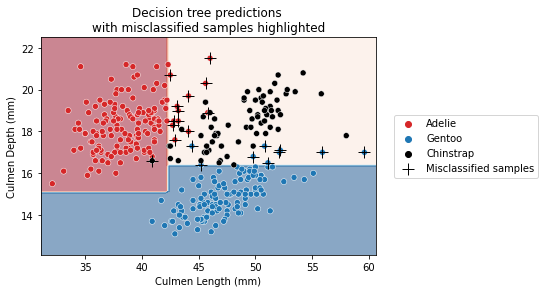

In [43]:
import matplotlib.pyplot as plt
from utils import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    tree,
    data,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

# plot the original dataset
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)

# plot the misclassified samples
sns.scatterplot(
    data=data_misclassified,
    x=culmen_columns[0],
    y=culmen_columns[1],
    label="Misclassified samples",
    marker="+",
    s=150,
    color="k"
)

plt.legend(
    bbox_to_anchor=(1.04, 0.5),
    loc="center left"
)

_ = plt.title(
    "Decision tree predictions \nwith misclassified samples highlighted"
)

In [44]:
sample_weight = np.zeros_like(target, dtype=int)

sample_weight[misclassified_samples_idx] = 1

tree = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)

tree.fit(
    data,
    target,
    sample_weight=sample_weight
)

DecisionTreeClassifier(max_depth=2, random_state=42)

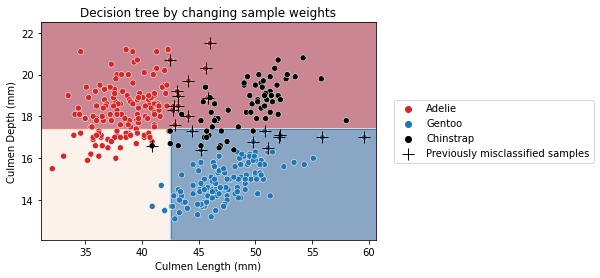

In [45]:
DecisionBoundaryDisplay.from_estimator(
    tree,
    data,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)

sns.scatterplot(
    data=data_misclassified,
    x=culmen_columns[0],
    y=culmen_columns[1],
    label="Previously misclassified samples",
    marker="+",
    s=150,
    color="k"
)

plt.legend(
    bbox_to_anchor=(1.04, 0.5),
    loc="center left"
)

_ = plt.title("Decision tree by changing sample weights")

In [46]:
target_predicted = tree.predict(data)
newly_misclassified_samples_idx = np.flatnonzero(
    target != target_predicted
)

remaining_misclassified_samples_idx = np.intersect1d(
    misclassified_samples_idx,
    newly_misclassified_samples_idx
)


print(
    f"Number of samples previously misclassified and "
    f"still misclassified: {len(remaining_misclassified_samples_idx)}"
)

Number of samples previously misclassified and still misclassified: 0


In [47]:
"""

The first classifier was 94% accurate and the second one 69% accurate.
Therefore, when predicting a class, we should trust the first classifier
slightly more than the second one. We could use these accuracy values to
weight the predictions of each learner.

"""
ensemble_weight = [
    (target.shape[0] - len(misclassified_samples_idx)) / target.shape[0],
    (target.shape[0] - len(newly_misclassified_samples_idx)) / target.shape[0],
]
ensemble_weight

[0.935672514619883, 0.6929824561403509]

In [48]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

adaboost = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=3,
    algorithm="SAMME",
    random_state=42
)

adaboost.fit(data, target)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=42),
                   n_estimators=3, random_state=42)

<Figure size 432x288 with 0 Axes>

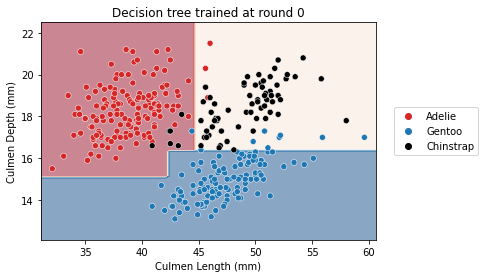

<Figure size 432x288 with 0 Axes>

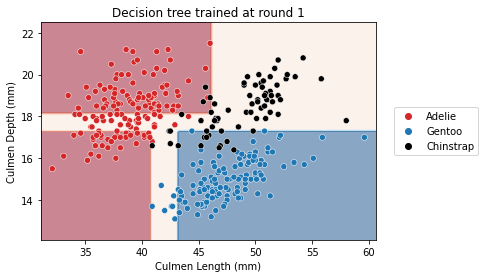

<Figure size 432x288 with 0 Axes>

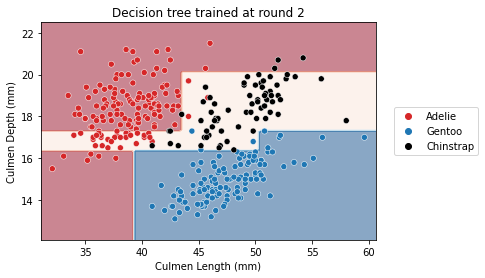

In [49]:
for boosting_round, tree in enumerate(adaboost.estimators_):
    plt.figure()
    
    # we convert `data` into a NumPy array to avoid a warning raised in scikit-learn
    DecisionBoundaryDisplay.from_estimator(
        tree, data.to_numpy(),
        response_method="predict",
        cmap="RdBu",
        alpha=0.5
    )

    sns.scatterplot(
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        data=penguins,
        palette=palette
    )

    plt.legend(
        bbox_to_anchor=(1.04, 0.5),
        loc="center left"
    )
    
    _ = plt.title(f"Decision tree trained at round {boosting_round}")

**Quick Note**

We see that AdaBoost learned three different classifiers, each of which focuses on different samples. Looking at the weights of each learner, we see that the ensemble gives the highest weight to the first classifier. This indeed makes sense when we look at the errors of each classifier. The first classifier also has the highest classification generalization performance.

While AdaBoost is a nice algorithm to demonstrate the internal machinery of
boosting algorithms, it is not the most efficient.

This title is handed to the gradient-boosting decision tree (GBDT) algorithm,
which we will discuss next.

##### Gradient-boosting decision tree (GBDT)

Now we will look at the gradient boosting decision tree algorithm and contrast it with AdaBoost.

Gradient-boosting differs from AdaBoost due to the following reason: instead of assigning weights to specific samples, GBDT will fit a decision tree on the residuals error (hence the name "gradient") of the previous tree.

Therefore, each new tree in the ensemble predicts the error made by the previous learner instead of predicting the target directly.

We will provide some intuition about the way learners are combined to give the final prediction. 

We will use the same synthetic data for which we know the underlyting "true" model.

As we discussed, boosting will be based on assembling a sequence of learners. We will start by creating a decision tree regressor. We will set the depth of the tree so that the resulting learner will underfit the data.


Since the tree will underfit the data, its accuracy will be far from perfect on the
training data. We can observe this in a figure by looking at the difference
between the predictions and the ground-truth data. We will represent these errors,
called "Residuals", by unbroken red lines and will notice that our initial tree is not expressive enough to handle the complexity of the data.

In a gradient-boosting algorithm, the idea is to create a second tree which, given the same data `data`, will try to predict the residuals instead of the vector `target`. 

We will therefore have a tree that is able to predict the errors made by the initial tree. We will see that this new tree only manages to fit some of the residuals. We will focus on a specific sample from the training set (i.e. we know that the sample will be well predicted using two successive trees). We will use this sample to explain how the predictions of both trees are combined. 

We chose a sample for which only two trees were enough to make the perfect
prediction. However, we saw in the previous plot that two trees were not
enough to correct the residuals of all samples. Therefore, one needs to
add several trees to the ensemble to successfully correct the error
(i.e. the second tree corrects the first tree's error, while the third tree
corrects the second tree's error and so on).


Finally, We will compare the generalization performance of random-forest and gradient boosting on the California housing dataset.

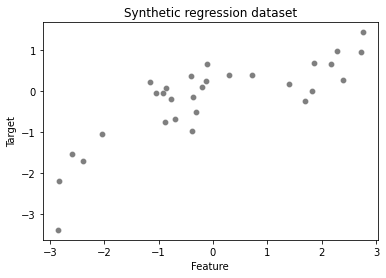

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

data_train, data_test, target_train = generate_data()

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

_ = plt.title("Synthetic regression dataset")

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

tree.fit(data_train, target_train)

target_train_predicted = tree.predict(data_train)
"""
Using the term "test" here refers to data that was not used for training.
It should not be confused with data coming from a train-test split, as it
was generated in equally-spaced intervals for the visual evaluation of the
predictions.
"""
target_test_predicted = tree.predict(data_test)

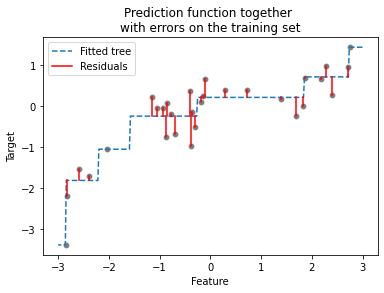

In [52]:
# plot the data
sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

# plot the predictions
line_predictions = plt.plot(
    data_test["Feature"],
    target_test_predicted, "--"
)

# plot the residuals
for value, true, predicted in zip(data_train["Feature"],
                                  target_train,
                                  target_train_predicted):
    lines_residuals = plt.plot(
        [value, value],
        [true, predicted],
        color="red"
    )

"""
we manually edited the legend to get only a single label
for all the residual lines
"""
plt.legend(
    [line_predictions[0],
    lines_residuals[0]],
    ["Fitted tree", "Residuals"]
)

_ = plt.title("Prediction function together \nwith errors on the training set")

In [53]:
residuals = target_train - target_train_predicted

tree_residuals = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

tree_residuals.fit(
    data_train,
    residuals
)

target_train_predicted_residuals = tree_residuals.predict(data_train)

target_test_predicted_residuals = tree_residuals.predict(data_test)

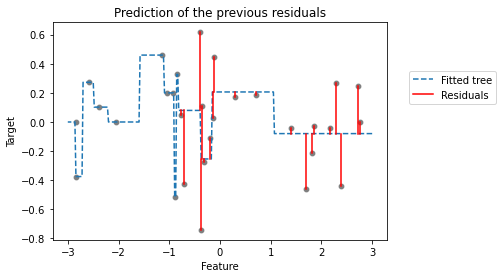

In [54]:
sns.scatterplot(
    x=data_train["Feature"],
    y=residuals,
    color="black",
    alpha=0.5
)

line_predictions = plt.plot(
    data_test["Feature"],
    target_test_predicted_residuals,
    "--"
)

# plot the residuals of the predicted residuals
for value, true, predicted in zip(data_train["Feature"],
                                  residuals,
                                  target_train_predicted_residuals):
    lines_residuals = plt.plot(
        [value, value],
        [true, predicted],
        color="red"
    )

plt.legend([line_predictions[0], lines_residuals[0]],
           ["Fitted tree", "Residuals"], bbox_to_anchor=(1.05, 0.8),
           loc="upper left")
_ = plt.title("Prediction of the previous residuals")

In [55]:
sample = data_train.iloc[[-2]]
x_sample = sample['Feature'].iloc[0]
target_true = target_train.iloc[-2]
target_true_residual = residuals.iloc[-2]

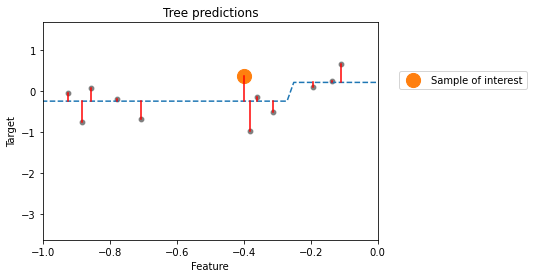

In [56]:
# Plot the previous information:
#   * the dataset
#   * the predictions
#   * the residuals

sns.scatterplot(
    x=data_train["Feature"],
    y=target_train,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test["Feature"],
    target_test_predicted,
    "--"
)

for value, true, predicted in zip(data_train["Feature"],
                                  target_train,
                                  target_train_predicted):

    lines_residuals = plt.plot(
        [value, value],
        [true, predicted],
        color="red"
    )

# Highlight the sample of interest
plt.scatter(sample, target_true, label="Sample of interest",
            color="tab:orange", s=200)

plt.xlim([-1, 0])

plt.legend(
    bbox_to_anchor=(1.05, 0.8),
    loc="upper left"
)

_ = plt.title("Tree predictions")

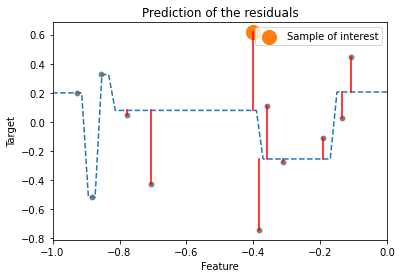

In [57]:
# Plot the previous information:
#   * the residuals committed by the first tree
#   * the residual predictions
#   * the residuals of the residual predictions

sns.scatterplot(
    x=data_train["Feature"],
    y=residuals,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test["Feature"],
    target_test_predicted_residuals,
    "--"
)

for value, true, predicted in zip(data_train["Feature"],
                                  residuals,
                                  target_train_predicted_residuals):
    lines_residuals = plt.plot(
        [value, value],
        [true, predicted],
        color="red"
    )

# Highlight the sample of interest
plt.scatter(
    sample,
    target_true_residual,
    label="Sample of interest",
    color="tab:orange",
    s=200
)

plt.xlim([-1, 0])
plt.legend()
_ = plt.title("Prediction of the residuals")

In [58]:
print(
      f"True value to predict for "
      f"f(x={x_sample:.3f}) = {target_true:.3f}"
)

y_pred_first_tree = tree.predict(sample)[0]

print(
      f"Prediction of the first decision tree for x={x_sample:.3f}: "
      f"y={y_pred_first_tree:.3f}"
)

print(
      f"Error of the tree: {target_true - y_pred_first_tree:.3f}"
)

True value to predict for f(x=-0.400) = 0.377
Prediction of the first decision tree for x=-0.400: y=-0.239
Error of the tree: 0.616


In [59]:
print(
      f"Prediction of the residual for x={x_sample:.3f}: "
      f"{tree_residuals.predict(sample)[0]:.3f}"
)

Prediction of the residual for x=-0.400: 0.079


In [60]:
y_pred_first_and_second_tree = (
    y_pred_first_tree + tree_residuals.predict(sample)[0]
)

print(
    f"Prediction of the first and second decision trees combined for "
    f"x={x_sample:.3f}: y={y_pred_first_and_second_tree:.3f}"
)

print(
    f"Error of the tree: {target_true - y_pred_first_and_second_tree:.3f}"
)

Prediction of the first and second decision trees combined for x=-0.400: y=-0.160
Error of the tree: 0.537


In [61]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_validate

data, target = fetch_california_housing(
    return_X_y=True,
    as_frame=True
)

target *= 100  # rescale the target in k$

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
    n_estimators=200
)

cv_results_gbdt = cross_validate(
    gradient_boosting,
    data,
    target,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)

In [63]:
print("Gradient Boosting Decision Tree")

print(
      f"Mean absolute error via cross-validation: "
      f"{-cv_results_gbdt['test_score'].mean():.3f} +/- "
      f"{cv_results_gbdt['test_score'].std():.3f} k$"
)

print(
      f"Average fit time: "
      f"{cv_results_gbdt['fit_time'].mean():.3f} seconds"
)

print(
      f"Average score time: "
      f"{cv_results_gbdt['score_time'].mean():.3f} seconds"
)

Gradient Boosting Decision Tree
Mean absolute error via cross-validation: 46.445 +/- 2.915 k$
Average fit time: 6.135 seconds
Average score time: 0.007 seconds


In [64]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    n_estimators=200,
    n_jobs=2
)

cv_results_rf = cross_validate(
    random_forest,
    data,
    target,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [65]:
print("Random Forest")

print(
    f"Mean absolute error via cross-validation: "
    f"{-cv_results_rf['test_score'].mean():.3f} +/- "
    f"{cv_results_rf['test_score'].std():.3f} k$"
)

print(
    f"Average fit time: "
    f"{cv_results_rf['fit_time'].mean():.3f} seconds"
)

print(
    f"Average score time: "
    f"{cv_results_rf['score_time'].mean():.3f} seconds"
)

Random Forest
Mean absolute error via cross-validation: 46.476 +/- 4.466 k$
Average fit time: 6.939 seconds
Average score time: 0.062 seconds


##### Experiments with Trees

Now we do a few experiments to see 

1. Does a random forest or a gradient-boosting decision tree overfit if the number of estimators is not chosen correctly;

2. Can we use the early-stopping strategy to avoid adding unnecessary trees, to get the best generalization performances.

We will use the California housing dataset to conduct our experiments.

We will create a gradient boosting decision tree with `max_depth=5` and `learning_rate=0.5` and a random forest with fully grown trees by setting `max_depth=None`. Then we create a validation curve using the training set to assess the impact of the number of trees on the performance of each model. 

We will evaluate the list of parameters  `param_range = [1, 2, 5, 10, 20, 50, 100]` and use the mean absolute error.

<br>

Initially, the gradient boosting and random forest models will improve when increasing the number of trees in the ensemble. However, it will reach a plateau where adding new trees will make fitting and scoring slower.

To avoid adding unnecessary trees, unlike the random-forest, gradient-boosting offers an early-stopping option. Internally, the algorithm will use an out-of-sample set to compute the model's generalization performance at each addition of a tree. Thus, if the generalization performance is not improving for several iterations, it will stop adding trees.

After that, we create a gradient-boosting model with `n_estimators=1_000`. As this is a large number of trees, we will change the parameter `n_iter_no_change` so that the gradient boosting fitting will stop after adding five trees that do not improve the overall generalization performance.

We see that the number of trees used is far below 1000 with the current dataset. Training the gradient boosting model with the entire 1000 trees would have been useless.

Then we estimate the generalization performance of this model again using the `sklearn.metrics.mean_absolute_error` metric, but this time using the test set that we held out at the beginning. We compare the resulting value with the values observed in the validation curve.

We will observe that the MAE value measure on the held-out test set is close to the validation error measured on the right hand side of the validation curve. It means that both the cross-validation procedure and the outer train-test split roughly agree as approximations of the true generalization performance of the model. 

We will observe that the test error's final evaluation seems to be slightly below the cross-validated test scores because the final model has been trained on the entire training set while the cross-validation models have been trained on smaller subsets. The larger the number of training points, the lower the test error.



In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(
    return_X_y=True,
    as_frame=True
)
target *= 100  # rescale the target in k$

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42,
    test_size=0.5
)

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt = GradientBoostingRegressor(
    max_depth=5,
    learning_rate=0.5
)
gbdt

GradientBoostingRegressor(learning_rate=0.5, max_depth=5)

In [68]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    max_depth=None
)
forest

RandomForestRegressor()

In [69]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100]
gbdt_train_scores, gbdt_validation_scores = validation_curve(
    gbdt,
    data_train,
    target_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
gbdt_train_errors, gbdt_validation_errors = -gbdt_train_scores, -gbdt_validation_scores



In [70]:
forest_train_scores, forest_validation_scores = validation_curve(
    forest,
    data_train,
    target_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
forest_train_errors = -forest_train_scores
forest_validation_errors = -forest_validation_scores

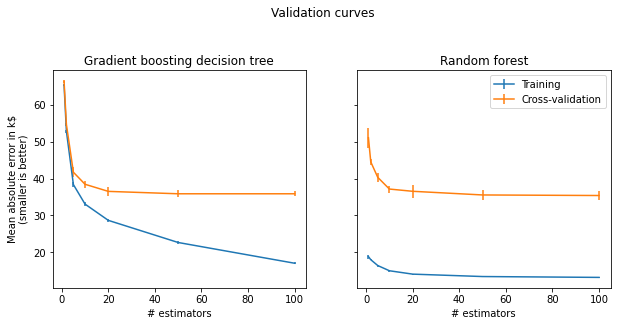

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(10, 4)
)

axs[0].errorbar(
    param_range,
    gbdt_train_errors.mean(axis=1),
    yerr=gbdt_train_errors.std(axis=1),
    label="Training",
)

axs[0].errorbar(
    param_range,
    gbdt_validation_errors.mean(axis=1),
    yerr=gbdt_validation_errors.std(axis=1),
    label="Cross-validation",
)

axs[0].set_title("Gradient boosting decision tree")
axs[0].set_xlabel("# estimators")
axs[0].set_ylabel("Mean absolute error in k$\n(smaller is better)")

axs[1].errorbar(
    param_range,
    forest_train_errors.mean(axis=1),
    yerr=forest_train_errors.std(axis=1),
    label="Training",
)

axs[1].errorbar(
    param_range,
    forest_validation_errors.mean(axis=1),
    yerr=forest_validation_errors.std(axis=1),
    label="Cross-validation",
)

axs[1].set_title("Random forest")
axs[1].set_xlabel("# estimators")

plt.legend()
_ = fig.suptitle("Validation curves", y=1.1)

In [72]:
gbdt = GradientBoostingRegressor(
    n_estimators=1_000,
    n_iter_no_change=5
)

gbdt.fit(
    data_train,
    target_train
)

gbdt.n_estimators_

147

In [73]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(
    target_test,
    gbdt.predict(data_test)
)

print(f"On average, our GBDT regressor makes an error of {error:.2f} k$")

On average, our GBDT regressor makes an error of 35.67 k$


##### Speeding-up the gradient-boosting 

This section presents a modified version of gradient boosting, which uses a reduced number of splits when building the different trees. This algorithm is called "histogram gradient boosting" in scikit-learn.

**We previously mentioned that random-forest is an efficient algorithm since it can fit each tree of the ensemble at the same time independently. Therefore, the algorithm scales efficiently with the number of cores and the number of samples.**

<br>

In gradient-boosting, the algorithm is sequential. 

It requires the previous `N-1` trees to have been fit to fit the tree at stage `N`. 


Therefore, the algorithm is quite computationally expensive. And the most expensive part of this algorithm is the search for the best split achieved with a brute-force approach: all possible splits are evaluated, and the best one is picked. 


To accelerate the gradient-boosting algorithm, one could reduce the number of splits to be evaluated, but that would reduce the generalization performance of such a tree. However, since we combine several trees in a gradient-boosting, we can add more estimators to overcome this issue.


We will make a naive implementation of such an algorithm using building blocks from scikit-learn. 


First, we will load the California housing dataset. We can *bin* the data before the gradient boosting to reduce the number of splits considered within the tree building. A transformer called `KBinsDiscretizer` does such a transformation. Thus, we can pipeline this preprocessing with gradient boosting.


We first demonstrate the transformation done by the `KBinsDiscretizer`.


`KBinsDiscretizer` transforms the original data into integral values (even though they are encoded using a floating-point representation). Each value represents the bin index when the distribution by quantile is performed. We will check the number of bins per feature. We see that by using  `KBinsDiscretizer` fit time has been reduced but that the model's generalization performance is identical.  


Scikit-learn provides specific classes which are even more optimized for large dataset, called `HistGradientBoostingClassifier` and `HistGradientBoostingRegressor`. 


Each feature in the dataset data is first binned by computing histograms, used later to evaluate the potential splits. The number of splits to evaluate is then much smaller. 


*This algorithm becomes much more efficient than gradient boosting when the dataset has over 10,000 samples.*


In [74]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [75]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
    n_estimators=200
)

gradient_boosting


GradientBoostingRegressor(n_estimators=200)

In [76]:
cv_results_gbdt = cross_validate(
    gradient_boosting,
    data,
    target,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [77]:
print(
      "Gradient Boosting Decision Tree"
)

print(
      f"Mean absolute error via cross-validation: "
      f"{-cv_results_gbdt['test_score'].mean():.3f} +/- "
      f"{cv_results_gbdt['test_score'].std():.3f} k$"
)

print(
      f"Average fit time: "
      f"{cv_results_gbdt['fit_time'].mean():.3f} seconds"
)

print(
      f"Average score time: "
      f"{cv_results_gbdt['score_time'].mean():.3f} seconds"
)

Gradient Boosting Decision Tree
Mean absolute error via cross-validation: 46.411 +/- 2.917 k$
Average fit time: 6.189 seconds
Average score time: 0.008 seconds


In [78]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(
    n_bins=128,
    encode="ordinal",
    strategy="quantile"
)

discretizer

KBinsDiscretizer(encode='ordinal', n_bins=128)

In [79]:
data_trans = discretizer.fit_transform(data)
data_trans

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.



array([[124.,  38., 115., ...,  41., 101.,  16.],
       [124.,  18., 101., ...,  14., 101.,  16.],
       [121.,  47., 124., ...,  62., 100.,  15.],
       ...,
       [  8.,  14.,  63., ...,  24., 121.,  42.],
       [ 11.,  15.,  68., ...,  14., 121.,  39.],
       [ 26.,  13.,  65., ...,  46., 120.,  41.]])

In [80]:
[len(np.unique(col)) for col in data_trans.T]

[128, 48, 128, 127, 128, 128, 125, 128]

In [81]:
from sklearn.pipeline import make_pipeline

gradient_boosting = make_pipeline(
    discretizer,
    GradientBoostingRegressor(
        n_estimators=200
    )
)

gradient_boosting

Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(encode='ordinal', n_bins=128)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=200))])

In [82]:
cv_results_gbdt = cross_validate(
    gradient_boosting,
    data,
    target,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasi

In [83]:
print(
      "Gradient Boosting Decision Tree with KBinsDiscretizer"
)

print(
      f"Mean absolute error via cross-validation: "
      f"{-cv_results_gbdt['test_score'].mean():.3f} +/- "
      f"{cv_results_gbdt['test_score'].std():.3f} k$"
)

print(
      f"Average fit time: "
      f"{cv_results_gbdt['fit_time'].mean():.3f} seconds"
)

print(
      f"Average score time: "
      f"{cv_results_gbdt['score_time'].mean():.3f} seconds"
)

Gradient Boosting Decision Tree with KBinsDiscretizer
Mean absolute error via cross-validation: 45.841 +/- 2.987 k$
Average fit time: 5.967 seconds
Average score time: 0.010 seconds


In [84]:
from sklearn.ensemble import HistGradientBoostingRegressor

histogram_gradient_boosting = HistGradientBoostingRegressor(
    max_iter=200,
    random_state=42
)

histogram_gradient_boosting

HistGradientBoostingRegressor(max_iter=200, random_state=42)

In [85]:
cv_results_hgbdt = cross_validate(
    histogram_gradient_boosting,
    data,
    target,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)

In [86]:
print(
      "Histogram Gradient Boosting Decision Tree"
)

print(
      f"Mean absolute error via cross-validation: "
      f"{-cv_results_hgbdt['test_score'].mean():.3f} +/- "
      f"{cv_results_hgbdt['test_score'].std():.3f} k$"
)

print(
      f"Average fit time: "
      f"{cv_results_hgbdt['fit_time'].mean():.3f} seconds"
)

print(
      f"Average score time: "
      f"{cv_results_hgbdt['score_time'].mean():.3f} seconds"
)

Histogram Gradient Boosting Decision Tree
Mean absolute error via cross-validation: 44.319 +/- 3.106 k$
Average fit time: 6.326 seconds
Average score time: 0.042 seconds


##### QUIZ 2

**1. Select the correct answers:**

a) Both bagging and boosting are combining predictors 

b) Both bagging and boosting are only working with decision trees 

c) Boosting combines predictors sequentially 

d) Bagging combines predictors simultaneously

<br>

**2. Boosting algorithms learn their predictor:**

a) by training predictors in parallel on slightly different datasets

b) by training predictors sequentially which correct previous prediction errors

c) by taking a linear combination of weak predictors


<br>


**3. Histogram gradient boosting is an accelerated gradient boosting algorithm that:**

a) takes a subsample of the original samples

b) bins the numerical features

c) takes a subsample of the original features

<br>

**4. Boosting tends to overfit when increasing the number of predictors:**

a) true

b) false


<br>


#### Bagging vs Boosting 

The main takeaway from this lesson is that there are two prominent families to build ensembles of base models and, in particular, ensembles of decision trees. 

The first family is called bagging for bootstrap aggregating. And when you specialize in decision trees, we have random forests as a particular example. Still, we will fit individual models independently on random subsamples, subsets of the initial training set for any bagging ensemble.

If we use decision trees, you will tend to use deep decision trees - very, very large trees with many splits - and each will overfit individually. But by taking the average of the predictions, we can cancel out the overfitting of the individual decision trees, and the ensemble will not overfit much anymore. 

Suppose you take many trees in the ensemble. The alternative strategy, which is philosophically the opposite, is to fit individual trees sequentially instead of independently. 

So, to fit the second tree in the boosting ensemble, you need to have access to the prediction errors of the first tree in the ensemble. Whereas for bagging, you could fit them independently. There is no dependency between the different trees. But, in boosting, you would then use shallow decision trees that individually underfit. But, because the trees correct one another's prediction errors sequentially, we can reduce the underfitting behavior of the previous stages of the ensemble. 

In practice, we would use gradient boosting, and gradient boosting tends to work better than bagging or random forest. Furthermore, a gradient boosting ensemble of 100 decision trees -  the individual decision trees of boosting ensembles are shallow - tends to predict much faster. They have to go through a few predictions splits when they make a prediction.
 
Whereas for bagging, we would use deep trees. So, if you have an ensemble with 100 decision trees and since the individual decision trees are more computationally expensive, the aggregate is also more computationally expensive. So that makes a difference in practice if you deploy your machine learning model at scale. 


![bagging vs boosting](../figures/boosting/BAG_vs_BOOST.png)


#### Hyperparameter tuning

There are a couple of things to keep in mind while setting the parameters of random forest and gradient-boosting. 

This section gives crucial information regarding setting the hyperparameters of random forest and gradient boosting decision tree models.

*Note*

We will not use cross-validation to estimate the testing error for this demonstration. We are only showing the effect of the parameters on the validation set of what should be the inner cross-validation.

**Random forest**

The main parameter to tune for a random forest is the `n_estimators` parameter. The goal is to balance computing time and generalization performance when setting the number of estimators when putting such learners in production. The more trees in the forest, the better the generalization performance will be. However, it will slow down the fitting and prediction time.

Then, we could also tune a parameter that controls the depth of each tree in the forest. Two parameters to control depth are: `max_depth` and `max_leaf_nodes`. They differ in the way they control the tree structure. Indeed, `max_depth` will enforce to have a more symmetric tree while `max_leaf_nodes` does not impose such a constraint.

**Be aware that with random forests, trees are generally deep since we seek to overfit each tree on each bootstrap sample because combining them will mitigate this by combining them. 
Assembling underfitted trees (i.e., shallow trees) might also lead to an underfitted forest.**

We will estimate the generalization performance of the best model by refitting it with the entire training set and using the test set for scoring on unseen data. 


<br>


**Gradient-boosting decision trees**

For gradient-boosting, parameters are coupled, so we can no longer set the parameters one after the other. The important parameters are `n_estimators`, `learning_rate`, and `max_depth` or `max_leaf_nodes`. 

We first discuss the `max_depth` (or `max_leaf_nodes`) parameter. We saw in the section on gradient-boosting that the algorithm fits the error of the previous trees in the ensemble. Thus, fitting fully grown trees would be detrimental. Indeed, the first tree of the ensemble would perfectly fit (overfit) the data, and thus, no subsequent tree would be required since there would be no residuals. Therefore, the tree used in gradient-boosting should have a low depth, typically between 3 to 8 levels, or few leaves ($2^3=8$ to $2^8=256$). Having very weak learners at each step will help reduce overfitting.

Considering this, the deeper the trees, the faster the residuals will be corrected, and fewer learners are required. Therefore, `n_estimators` should be increased if `max_depth` is lower.

Finally, we have overlooked the impact of the `learning_rate` parameter until now. When fitting the residuals, we would like the tree to try to correct all possible errors or only a fraction of them. The `learning-rate` allows you to control this behavior. A small learning-rate value would only correct the residuals of very few samples. If a large `learning-rate` is set (e.g., 1), we would fit the residuals of all samples. So, we will need more estimators to correct the overall error with a very low `learning-rate`. 

However, a too large `learning-rate` tends to obtain an overfitted ensemble, similar to having a too large tree depth. We will tune the `n_estimators` but be aware that using early-stopping as in the previous exercise will be better.



In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)

In [88]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
}

search_cv = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=2),
    param_distributions=param_distributions,
    scoring="neg_mean_absolute_error",
    n_iter=10,
    random_state=42,
    n_jobs=2,
)

search_cv

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=2), n_jobs=2,
                   param_distributions={'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [89]:
search_cv.fit(data_train, target_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
"""
We observe in our search that trees are required to have a large a number of leaves. 
This parameter seems particularly impactful in comparison to the number of trees for this particular dataset: 
with at least 50 trees, the generalization performance will be driven by the number of leaves.

"""
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,mean_test_error,std_test_error
7,200,100,40.636525,0.831925
1,20,100,41.096639,0.896976
2,10,100,41.329480,0.965641
4,500,50,43.792098,0.787844
9,50,20,49.537260,1.113493
0,2,10,56.406465,1.194999
6,500,5,61.216395,1.103456
3,10,5,61.327519,0.996544
5,50,2,72.983944,1.099336
8,10,2,73.060295,1.184279


In [90]:
error = -search_cv.score(data_test, target_test)
print(f"On average, our random forest regressor makes an error of {error:.2f} k$")

On average, our random forest regressor makes an error of 40.36 k$


In [91]:
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=param_distributions,
    scoring="neg_mean_absolute_error",
    n_iter=20,
    random_state=42,
    n_jobs=2
)
search_cv


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=20, n_jobs=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16c1cd240>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [92]:
search_cv.fit(data_train, target_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]

"""
In this search, we see that the `learning_rate` is required to be large enough, i.e. > 0.1. 
We also observe that for the best ranked models, having a smaller `learning_rate`, will require more trees or a larger number of leaves for each tree. 
However, it is particularly difficult to draw more detailed conclusions since the best value of an hyperparameter depends on the other hyperparameter values.
"""

cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,mean_test_error,std_test_error
9,500,20,0.0582,33.864150,0.762192
19,200,20,0.061702,36.304388,0.820502
0,200,50,0.056115,36.640709,0.798243
6,50,5,0.171776,38.852270,0.812429
2,200,10,0.015847,45.321320,1.090578
14,100,20,0.028959,46.467968,1.060074
3,50,10,0.046496,49.672628,1.052116
12,2,100,0.766308,55.713127,1.135775
10,100,10,0.012385,59.742829,0.900456
13,20,5,0.058997,62.465612,1.042746


In [93]:
error = -search_cv.score(data_test, target_test)
print(f"On average, our GBDT regressor makes an error of {error:.2f} k$")

On average, our GBDT regressor makes an error of 33.49 k$


##### QUIZ 3

**1. When compared to random forests, gradient boosting is usually trained using:**

a) shallower trees

b) deeper trees

c) a subset of features

d) all features 

<br>

**2. Which of the hyperparameter(s) do not exist in random forest but exists in gradient boosting:**

a) number of estimators

b) maximum depth

c) learning rate

<br>

**3. Which of the following options are correct about the benefits of ensemble models?**

a) Better generalization performance 

b) Reduced sensitivity to hyperparameter tuning of individual predictors 

c) Better interpretability

<br>